# Preprocessing & EDA

Meteorological Parameters & Data Units

| Code      | Meaning      | Unit   |
|-------------|-------------|------------|
| temp   | Air Temperature   | °C   |
| dwpt   | Dew Point   | °C   |
| rhum   | Relative Humidity  | %   |
| prcp   | Total Precipitation  | mm   |
| snow   | Snow Depth   | mm   |
| wdir   | Wind (From) Direction   | Degrees   |
| wspd   | Average Wind Speed   | km/h   |
| wpgt   | Wind Peak Gust   | km/h   |
| pres   | Sea-Leavel Air Pressure   | hPa   |
| tsun   | Total Sunshine Duration   | Minutes
| coco   | Weather Condition Code   | 

Weather Condition Codes
| Code | Weather Condition       |
|------|--------------------------|
| 1    | Clear                   |
| 2    | Fair                    |
| 3    | Cloudy                  |
| 4    | Overcast                |
| 5    | Fog                     |
| 6    | Freezing Fog            |
| 7    | Light Rain              |
| 8    | Rain                    |
| 9    | Heavy Rain              |
| 10   | Freezing Rain           |
| 11   | Heavy Freezing Rain     |
| 12   | Sleet                   |
| 13   | Heavy Sleet             |
| 14   | Light Snowfall          |
| 15   | Snowfall                |
| 16   | Heavy Snowfall          |
| 17   | Rain Shower             |
| 18   | Heavy Rain Shower       |
| 19   | Sleet Shower            |
| 20   | Heavy Sleet Shower      |
| 21   | Snow Shower             |
| 22   | Heavy Snow Shower       |
| 23   | Lightning               |
| 24   | Hail                    |
| 25   | Thunderstorm            |
| 26   | Heavy Thunderstorm      |
| 27   | Storm                   |

source: https://dev.meteostat.net/formats.html#meteorological-parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium

In [2]:
data = pd.read_csv('../data/processed/weatherQN_2021_2025_processed.csv')
data.head(10)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
0,2021-01-02 00:00:00,20.0,17.4,85.0,0.0,350.0,20.2,1017.9,1.0
1,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,343.0,17.6,1016.1,1.0
2,2021-01-02 06:00:00,19.8,17.8,88.0,0.1,339.0,17.6,1016.7,1.0
3,2021-01-02 09:00:00,20.2,18.3,89.0,0.2,347.0,18.7,1018.4,1.0
4,2021-01-02 12:00:00,22.0,18.0,78.0,0.1,3.0,28.4,1016.4,1.0
5,2021-01-02 15:00:00,21.4,18.2,82.0,0.2,2.0,27.4,1015.0,1.0
6,2021-01-02 18:00:00,20.4,18.5,89.0,0.4,350.0,18.0,1016.3,1.0
7,2021-01-02 21:00:00,20.2,18.5,90.0,0.2,344.0,17.6,1017.6,1.0
8,2021-01-03 00:00:00,20.1,18.6,91.0,0.3,345.0,16.2,1017.3,1.0
9,2021-01-03 03:00:00,19.9,18.4,91.0,0.1,333.0,14.0,1015.2,1.0


In [3]:
data.shape

(12035, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    12035 non-null  object 
 1   temp    12035 non-null  float64
 2   dwpt    12035 non-null  float64
 3   rhum    12035 non-null  float64
 4   prcp    12035 non-null  float64
 5   wdir    12035 non-null  float64
 6   wspd    12035 non-null  float64
 7   pres    12035 non-null  float64
 8   coco    12035 non-null  float64
dtypes: float64(8), object(1)
memory usage: 846.3+ KB


In [5]:
data.isna().sum()

time    0
temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
pres    0
coco    0
dtype: int64

Some columns have a significant amount of missing values:

- **`prcp`** : 89 values are missing.  
- **`snow`** ,**`wpgt`** and **`tsun`** : No data available (entirely null).  
- **`coco`** : 12713 values are missing.  


In [6]:
data["year"] = pd.to_datetime(data["time"]).dt.year
data["month"] = pd.to_datetime(data["time"]).dt.month
data["day"] = pd.to_datetime(data["time"]).dt.day
data["hour"] = pd.to_datetime(data["time"]).dt.hour

In [7]:
data["year"].value_counts()

year
2023    2920
2022    2914
2021    2912
2024    2871
2025     418
Name: count, dtype: int64

 **2025**: not complete (only partial data available for this year).  

In [8]:
# we will drop it
data = data[data["year"] != 2025]

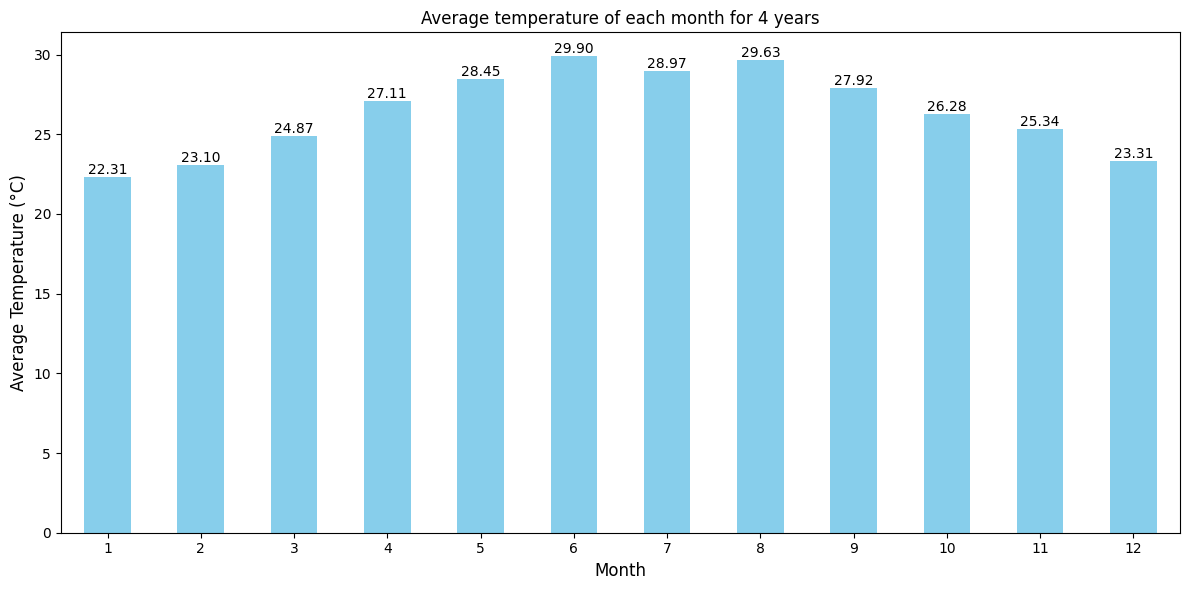

In [9]:
# Select years of interest and filter data
df_filtered = data[data['year'].isin([2021, 2022, 2023, 2024])]

# Calculate and plot monthly average temperature
ax = df_filtered.groupby('month')['temp'].mean().plot(
    kind='bar', figsize=(12, 6), color='skyblue', title='Average temperature of each month for 4 years'
)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
# Average rhum each month of each year
monthly_avg_rhum = df_filtered.groupby(['year', 'month'])['rhum'].mean()
monthly_avg_rhum

year  month
2021  1        83.408333
      2        82.196429
      3        85.294355
      4        83.912500
      5        80.995968
      6        64.962500
      7        69.830645
      8        71.048387
      9        85.287500
      10       86.794355
      11       89.645833
      12       82.322581
2022  1        85.782258
      2        85.361607
      3        85.608871
      4        85.854167
      5        83.582645
      6        76.829167
      7        79.794355
      8        80.391129
      9        85.245833
      10       84.479839
      11       85.912500
      12       82.625000
2023  1        84.322581
      2        86.107143
      3        83.189516
      4        81.237500
      5        80.471774
      6        72.958333
      7        73.512097
      8        65.858871
      9        80.750000
      10       87.903226
      11       85.187500
      12       86.858871
2024  1        83.169355
      2        85.650862
      3        84.612903
      4      

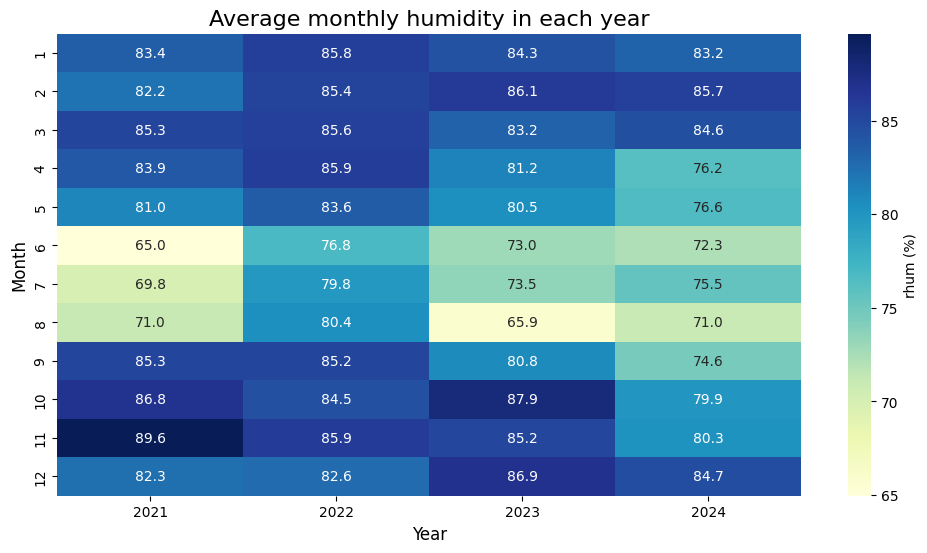

In [11]:
heatmap_data = monthly_avg_rhum.unstack(level=0) 
# Heatmap
plt.figure(figsize=(12, 6)) 
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'rhum (%)'})
plt.title("Average monthly humidity in each year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.show()

- Emperature and humidity exhibit an inverse relationship throughout the seasons. During summer (June to August), temperatures peak at 28-30°C, while humidity drops to its lowest (66-73%), resulting in a hot and dry feeling.
- In contrast, at the end of the year (September to December), as temperatures decrease to 23-26°C, humidity rises above 85%, bringing cooler and more humid conditions, often accompanied by rain or cold air.

In [12]:
value_counts = data["coco"].value_counts()

value_counts

coco
1.0     4712
3.0     4033
2.0      759
8.0      613
7.0      482
17.0     482
9.0      389
18.0      74
5.0       73
Name: count, dtype: int64

In [13]:
most_common_weather = data["coco"].value_counts().idxmax()
print(f"The most common weather condition (Weather Condition Code): {most_common_weather}")



The most common weather condition (Weather Condition Code): 1.0


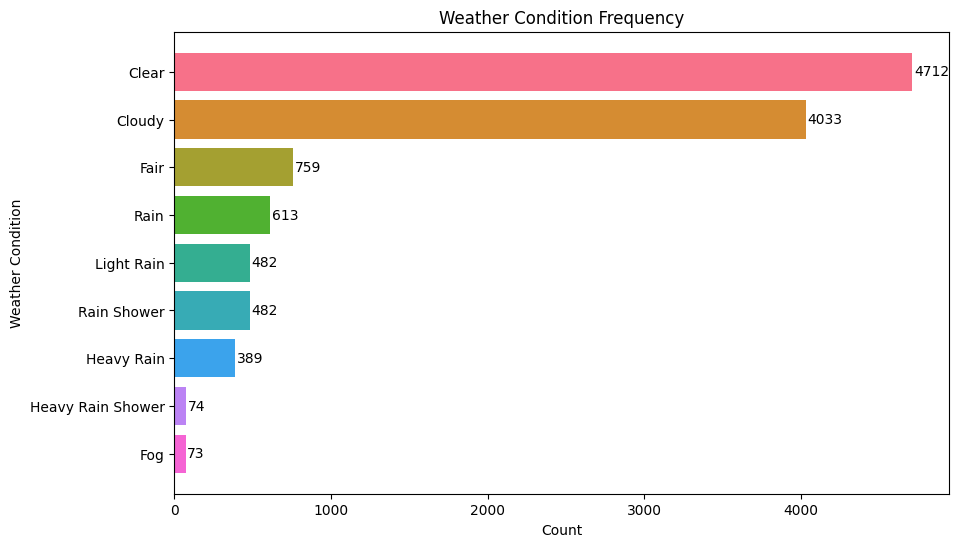

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

weather_names = {
    1.0: "Clear",
    3.0: "Cloudy",
    2.0: "Fair",
    8.0: "Rain",
    7.0: "Light Rain",
    17.0: "Rain Shower",
    9.0: "Heavy Rain",
    18.0: "Heavy Rain Shower",
    5.0: "Fog"
}

weather_labels = value_counts.index.map(lambda x: weather_names.get(x, f"Unknown {x}"))

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(value_counts))
bars = plt.barh(weather_labels, value_counts.values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), va='center', fontsize=10)

plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.title("Weather Condition Frequency")
plt.gca().invert_yaxis() 
plt.show()


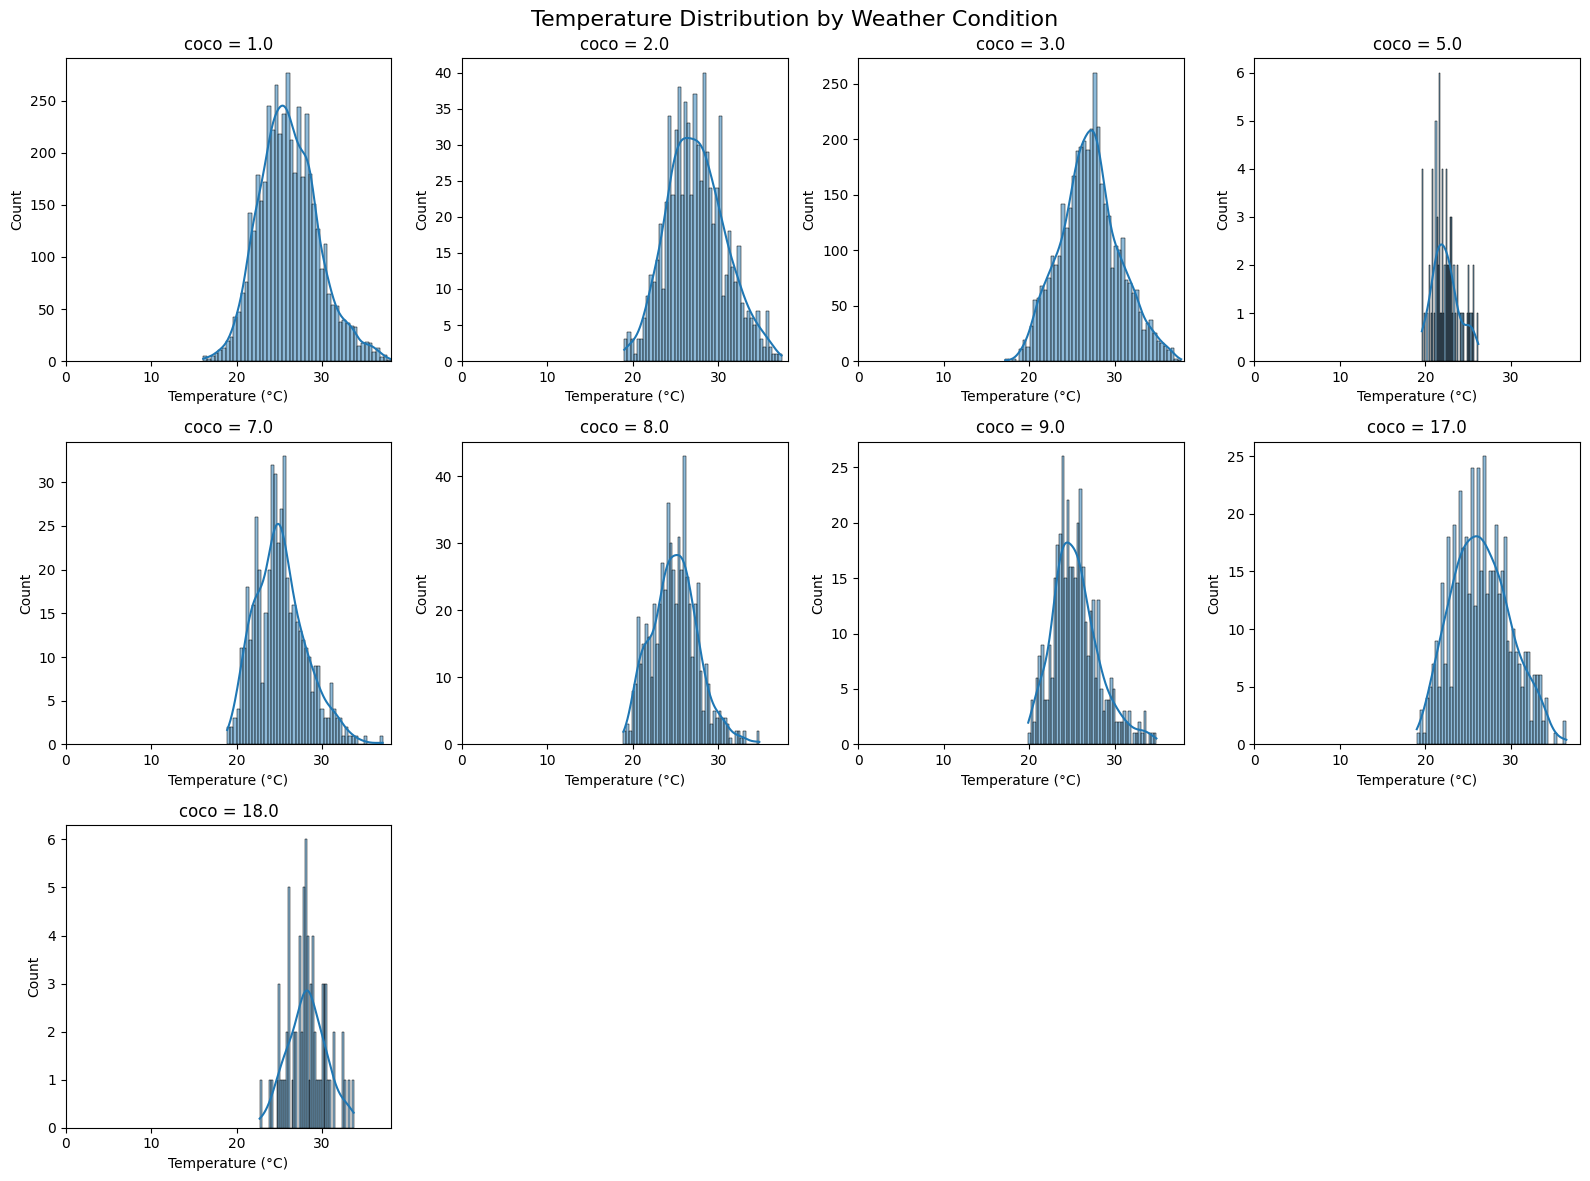

In [15]:
# Get unique values of coco
unique_coco = sorted(data["coco"].unique())
ncols = 4  # Number of columns
nrows = int(np.ceil(len(unique_coco) / ncols))  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))
axes = axes.flatten()  # Convert matrix to list for easier indexing

# Plot histogram for each coco value
for i, coco_value in enumerate(unique_coco):
    ax = axes[i]
    data_coco = data[data["coco"] == coco_value]
    
    sns.histplot(data_coco["temp"], bins=50, kde=True, ax=ax)
    ax.set_title(f"coco = {coco_value}")
    ax.set_xlim(0, data["temp"].max())  
    
    ax.set_xlabel("Temperature (°C)") 
    ax.set_ylabel("Count")

# Hide empty subplots if the number of coco values is not a multiple of ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Main title
fig.suptitle("Temperature Distribution by Weather Condition", fontsize=16)

plt.tight_layout()
plt.show()


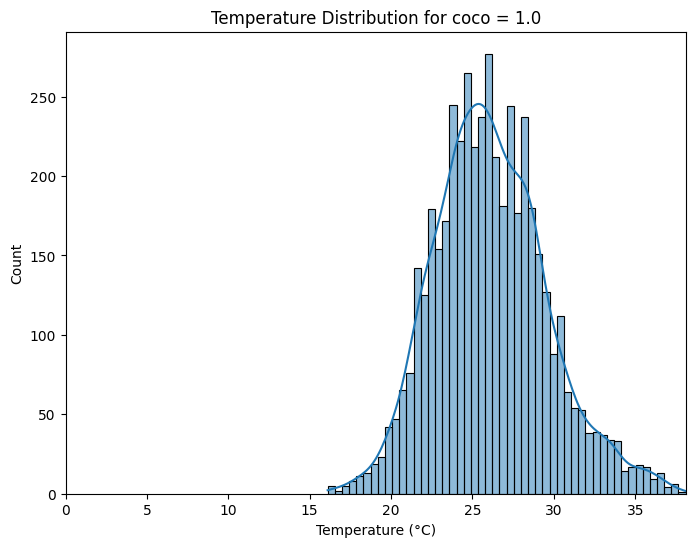

In [16]:
# Filter data to include only coco = 1.0
data_coco_1 = data[data["coco"] == 1.0]

# Plot histogram for coco = 1.0
plt.figure(figsize=(8, 6))
sns.histplot(data_coco_1["temp"], bins=50, kde=True)

# Set axis labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.title("Temperature Distribution for coco = 1.0")

# Set x-axis to start from 0
plt.xlim(0, data_coco_1["temp"].max())

plt.show()





- All coco groups have a similar temperature distribution ranging from 18°C to 32°C, indicating no significant temperature differences between weather conditions. 
- Temperature may influence coco, but it is not the sole determining factor, as other factors like humidity, pressure, wind, and rainfall also play important roles.